In [5]:
# 📦 Cell 1: Load MNIST dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype('int')

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)


In [7]:
# 🧠 Cell 2: Define the image shifting function
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    """Shifts a 28x28 MNIST image by dx (left/right) and dy (up/down)."""
    image = image.reshape(28, 28)
    shifted = shift(image, [dy, dx], cval=0, mode='constant')  # [dy, dx]
    return shifted.reshape(-1)


In [8]:
# 🔁 Cell 3: Augment the training set with shifted images
X_train_augmented = []
y_train_augmented = []

for image, label in zip(X_train, y_train):
    X_train_augmented.append(image)
    y_train_augmented.append(label)
    
    # Four directions: left, right, up, down
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        shifted_img = shift_image(image, dx, dy)
        X_train_augmented.append(shifted_img)
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print("Original training set size:", len(X_train))
print("Augmented training set size:", len(X_train_augmented))


Original training set size: 60000
Augmented training set size: 300000


In [9]:
# 🤖 Cell 4: Train the best model on the augmented data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Use best params from previous exercise
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train_augmented, y_train_augmented)

# Predict and evaluate on test set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy after augmentation:", accuracy)


Test accuracy after augmentation: 0.979


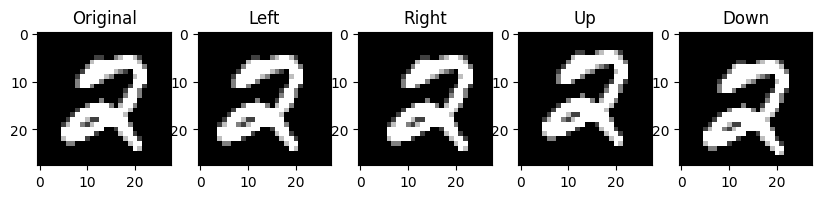

In [10]:
# 👀 Cell 5: Optional - Visualize original and shifted image
import matplotlib.pyplot as plt

index = 0
original = X_train[index].reshape(28, 28)
shifted_left = shift_image(X_train[index], -1, 0).reshape(28, 28)
shifted_right = shift_image(X_train[index], 1, 0).reshape(28, 28)
shifted_up = shift_image(X_train[index], 0, -1).reshape(28, 28)
shifted_down = shift_image(X_train[index], 0, 1).reshape(28, 28)

plt.figure(figsize=(10, 2))
plt.subplot(1, 5, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')

plt.subplot(1, 5, 2)
plt.title("Left")
plt.imshow(shifted_left, cmap='gray')

plt.subplot(1, 5, 3)
plt.title("Right")
plt.imshow(shifted_right, cmap='gray')

plt.subplot(1, 5, 4)
plt.title("Up")
plt.imshow(shifted_up, cmap='gray')

plt.subplot(1, 5, 5)
plt.title("Down")
plt.imshow(shifted_down, cmap='gray')
plt.show()
